In [1]:
# Big Mac Index (https://github.com/TheEconomist/big-mac-data/tree/master/output-data)
# Happiness Index (https://www.kaggle.com/unsdsn/world-happiness)
# Air Quality (https://www.who.int/airpollution/data/aap_air_quality_database_2018_v14.xlsx?ua=1)
# UV Index (https://www.who.int/uv/intersunprogramme/activities/uv_index/en/index3.html)
# Mortality Data (https://www.who.int/healthinfo/mortality_data/en/)
# GDP Per Capita (http://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.CD?downloadformat=csv)
# Population (https://www.who.int/healthinfo/Pop.zip?ua=1)
# ICD-10 Codes (ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/ICD10CM/2011/)

In [1]:
import pandas as pd

In [2]:
# WHO Mortality Data
# Part 1 - https://www.who.int/healthinfo/statistics/Morticd10_part1.zip?ua=1
# Part 2 - https://www.who.int/healthinfo/statistics/Morticd10_part2.zip?ua=1

mortality_part1 = pd.read_csv('Morticd10_part1.csv', low_memory = False)
mortality_part2 = pd.read_csv('Morticd10_part2.csv', low_memory = False)
mortality = pd.concat([mortality_part1, mortality_part2], sort = False)

# WHO Country Codes
# https://www.who.int/healthinfo/statistics/country_codes.zip?ua=1

country_codes = pd.read_csv('country_codes.csv', low_memory = False)

# WHO Population Data
# https://www.who.int/healthinfo/Pop.zip?ua=1

population = pd.read_csv('pop.csv', low_memory = False)

In [3]:
# ICD Codes for year 2011
# ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/ICD10CM/2011/

icd10_codes = pd.read_fwf('icd10_codes_2011.txt', header = None)
icd10_codes.columns = ["Code", "Description"]

In [4]:
# A peek at the Mortality data

mortality.head(1).T

,0
Country,1400
Admin1,NaN
SubDiv,NaN
Year,2001
List,101
Cause,1000
Sex,1
Frmat,7
IM_Frmat,8
Deaths1,332


In [5]:
# A peek at the WHO Country Codes

country_codes.head(1)

,country,name
0,1010,Algeria


In [6]:
# A peek at the Population dataset

population.head(1).T

,0
Country,1060
Admin1,NaN
SubDiv,NaN
Year,1980
Sex,1
Frmat,7
Pop1,137100
Pop2,3400
Pop3,15800
Pop4,NaN


In [7]:
# A peek at the ICD-10 codes for 2011

icd10_codes.head(1)

,Code,Description
0,A000,"Cholera due to Vibrio cholerae 01, biovar chol..."


In [8]:
name_dump = []

for code in population.Country:
    name = country_codes[country_codes['country'] == code]
    name_dump.append(name.iloc[0][1])

In [12]:
population.head(1).T

,0
Country,1060
Admin1,NaN
SubDiv,NaN
Year,1980
Sex,1
Frmat,7
Pop1,137100
Pop2,3400
Pop3,15800
Pop4,NaN


In [9]:
population['Country Name'] = pd.Series(name_dump)

In [10]:
# Let's see the five most recent years that poulation data are available

pd.Series(population.Year.unique()).sort_values(ascending = False).head()

65    2017
64    2016
47    2015
46    2014
45    2013
dtype: int64

In [11]:
# How many countries are using what type of grouping?

counts = []

for i in population.Frmat.unique():
    counts.append(len(population[population['Frmat'] == i]))

format_codes = pd.Series(population.Frmat.unique()).tolist()

format_code_usage = pd.DataFrame({'Format Code' : format_codes,
                                  'Code Use Counts' : counts})

format_code_usage.sort_values(by = 'Code Use Counts',
                              ascending = False)

,Format Code,Code Use Counts
6,1,3874
1,2,3185
5,0,1168
2,4,726
3,3,136
7,9,136
4,5,96
9,6,44
8,8,16
0,7,2


In [12]:
# What is the actual birth rate for each country, by year?

Lb_by_country_and_year = population.groupby(['Country Name', 'Year'])['Lb'].sum()
Pop1_by_country_and_year = population.groupby(['Country Name', 'Year'])['Pop1'].sum()

# Calculation done according to methodology described in
# "Calculate a Rate", located in the Documentation folder

birth_rate = (Lb_by_country_and_year * 1000) / Pop1_by_country_and_year

# Normalized birth rates will help us make more valid comparisons between countries and across regions (if we decide to go there)

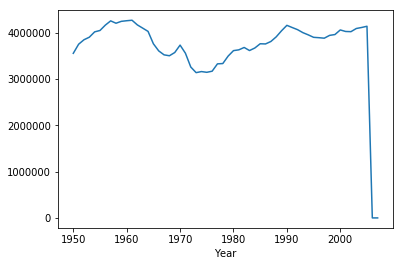

In [15]:
Lb_by_country_and_year['United States of America'].plot()

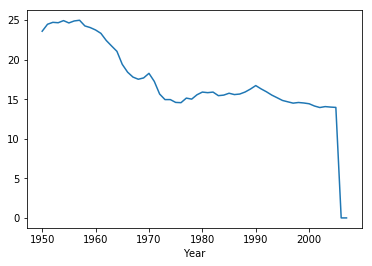

In [14]:
birth_rate['United States of America'].plot()

In [130]:
Deaths2_counts_by_country_year_and_cause = pd.DataFrame(mortality.groupby(['Country', 'Year', 'Cause'])['Deaths2'].sum())
Deaths2_counts_by_country_year_and_cause_non_null = Deaths2_counts_by_country_year_and_cause[Deaths2_counts_by_country_year_and_cause["Deaths2"]!=0]
Deaths2_counts_by_country_year_and_cause_non_null.sort_values(["Year", "Deaths2"],
                                                              ascending = False,
                                                              inplace = True)
Deaths2_counts_by_country_year_and_cause = Deaths2_counts_by_country_year_and_cause_non_null.reset_index()
output = Deaths2_counts_by_country_year_and_cause.groupby(["Country"]).head(4)
output.to_csv("Deaths2 Count by Cause and Year.csv",
              index = False)

C:\Users\Nicholas McCarty\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [152]:
population_2012 = population[population.Year == 2012]

In [153]:
Pop1_sum_2012 = population_2012.groupby(['Country'], as_index = False)['Pop1'].sum()

In [154]:
mortality_2012 = mortality[mortality.Year == 2012]

In [155]:
Deaths2_sum_2012 = mortality_2012.groupby(['Country'], as_index = False)['Deaths2'].sum()

In [156]:
merge = Deaths2_sum_2012.merge(Pop1_sum_2012, on = 'Country', how = 'outer')

In [157]:
len(merge)

119

In [158]:
len(merge.dropna())

63

In [159]:
merge = merge.dropna()

In [164]:
merge['Deaths2 to Pop1 Ratio'] = (merge.Deaths2 / merge.Pop1) * 100

In [166]:
merge = merge.sort_values('Deaths2 to Pop1 Ratio', ascending = False)

In [167]:
merge

,Country,Deaths2,Pop1,Deaths2 to Pop1 Ratio
85,4184,6180.0,5.607511e+06,0.110209
8,1430,54110.0,5.234170e+07,0.103378
1,1125,83560.0,8.256928e+07,0.101200
6,1365,30.0,3.816700e+04,0.078602
84,4182,11349.0,1.679143e+07,0.067588
57,3170,3632.0,6.388000e+06,0.056857
7,1400,40.0,8.830300e+04,0.045299
52,3030,128.0,3.998000e+05,0.032016
78,4084,1430.0,4.490700e+06,0.031844
67,4007,916.0,3.024127e+06,0.030290


In [168]:
name_dump = []

for code in merge.Country:
    name = country_codes[country_codes['country'] == code]
    name_dump.append(name.iloc[0][1])

In [170]:
merge['Country Name'] = pd.Series(name_dump)

In [172]:
merge.to_csv('Deaths2 to Pop1 Ratio by Country.csv')

In [210]:
mortality_2012 = mortality[mortality.Year == 2012]

In [211]:
Deaths2_2012_by_country_and_cause = pd.DataFrame(mortality_2012.groupby(['Country', 'Cause'])['Deaths2'].sum())

In [212]:
Deaths1_2012_by_country_and_cause = pd.DataFrame(mortality_2012.groupby(['Country', 'Cause'])['Deaths1'].sum())

In [213]:
merge2 = Deaths1_2012_by_country_and_cause.merge(Deaths2_2012_by_country_and_cause,
                                                 on ='Country',
                                                 how = 'outer')

In [214]:
merge2['Deaths2 to Deaths1 Ratio'] = (merge2.Deaths2 / merge2.Deaths1) * 100

In [218]:
merge2

,Deaths1,Deaths2,Deaths2 to Deaths1 Ratio
Country,,,
1060,1,0.0,0.0
1060,1,11.0,1100.0
1060,1,0.0,0.0
1060,1,0.0,0.0
1060,1,0.0,0.0
1060,1,17.0,1700.0
1060,1,231.0,23100.0
1060,1,0.0,0.0
1060,1,0.0,0.0


In [442]:
# Read World Bank GDP data into memory

gdp = pd.read_csv('GDP.csv')

# Grab 2012 subset

gdp_2012 = gdp[['Country Name', '2012']].copy()

# Rename columns

gdp_2012.rename({'2012' : 'GDP (per capita, in current USD)'},
                axis = 1,
                inplace = True)

# Calculate quantiles and put them in new column

gdp_2012['Quantile'] = pd.qcut(gdp_2012['GDP (per capita, in current USD)'], 5, ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

# Sort by GDP

gdp_2012 = gdp_2012.sort_values('GDP (per capita, in current USD)', ascending = False)

# Drop nulls

gdp_2012 = gdp_2012.dropna()

In [538]:
new_df = gdp_2012

excluded_words = ['dividend',
                  'World',
                  'small',
                  'IDA',
                  'IBRD',
                  'indebted',
                  'poor',
                  'conflict',
                  'developed',
                  'OECD',
                  'income',
                  'area',
                  'Small',
                  'Sub-Saharan',
                  'Middle East',
                  'Pacific',
                  'North America',
                  'European Union',
                  'Latin America & Caribbean',
                  'Arab World',
                  'Micronesia',
                  'Central Europe and the Baltics',
                  'Europe & Central Asia',
                  'South Asia']

for word in excluded_words:
    new_df = new_df[~new_df["Country Name"].str.contains(word)]

#gdp_2012 = new_df

In [539]:
new_df = new_df.dropna()

In [540]:
len(gdp_2012)

249

In [541]:
len(new_df)

202

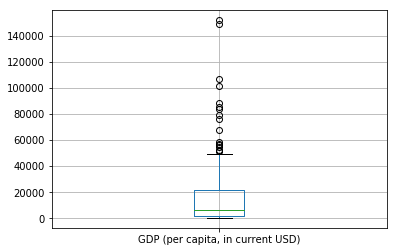

In [542]:
boxplot = new_df.boxplot('GDP (per capita, in current USD)')

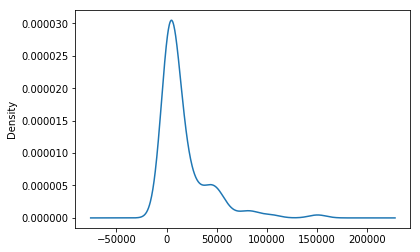

In [543]:
new_df['GDP (per capita, in current USD)'].plot('kde')

In [544]:
quantile_counts = []
quantile_labels = []

for i in new_df.Quantile.unique():
    quantile_counts.append(len(new_df[new_df['Quantile'] == i]))
    quantile_labels.append(i)

In [545]:
quantiles = pd.DataFrame({'Country Count': quantile_counts,
                          'GDP Quantile': quantile_labels})

quantiles.sort_values('GDP Quantile', inplace = True)

Text(0,0.5,'Country Count')

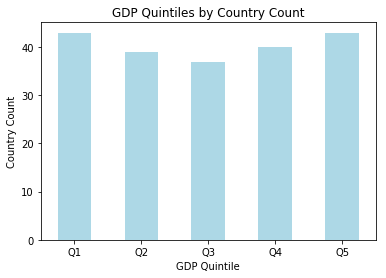

In [835]:
ax = quantiles.plot.bar(x = 'GDP Quantile',
                        y = 'Country Count',
                        color = 'lightblue',
                        legend = False,
                        title = 'GDP Quintiles by Country Count',
                        rot = 0)

ax.set_xlabel("GDP Quintile")
ax.set_ylabel("Country Count")

Text(0,0.5,'GDP (per capita, in current USD)')

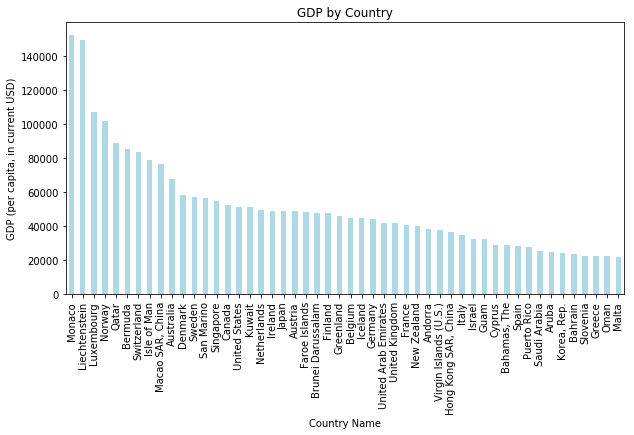

In [547]:
ax = new_df.head(50).plot.bar(x = 'Country Name',
                              y = 'GDP (per capita, in current USD)',
                              color = 'lightblue',
                              legend = False,
                              title = 'GDP by Country',
                              rot = 90,
                              figsize=(10, 5))

ax.set_ylabel("GDP (per capita, in current USD)")

In [685]:
Deaths2_counts_by_country_year_and_cause = pd.DataFrame(mortality.groupby(['Country', 'Year', 'Cause'])['Deaths2'].sum())
Deaths2_counts_by_country_year_and_cause_non_null = Deaths2_counts_by_country_year_and_cause[Deaths2_counts_by_country_year_and_cause["Deaths2"]!=0]
Deaths2_counts_by_country_year_and_cause_non_null.sort_values(["Year", "Deaths2"],
                                                              ascending = False,
                                                              inplace = True)
Deaths2_counts_by_country_year_and_cause = Deaths2_counts_by_country_year_and_cause_non_null.reset_index()

C:\Users\Nicholas McCarty\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [686]:
Deaths2_2012 = Deaths2_counts_by_country_year_and_cause[Deaths2_counts_by_country_year_and_cause.Year == 2012]

In [687]:
Deaths2_2012_totals = Deaths2_2012[Deaths2_2012.Cause == 'AAA']

In [691]:
new_df[new_df.Quantile == 'Q1']

,Country Name,"GDP (per capita, in current USD)",Quantile
54,Djibouti,1536.150685,Q1
107,India,1446.985410,Q1
260,"Yemen, Rep.",1421.171575,Q1
44,Comoros,1403.434335,Q1
217,Sao Tome and Principe,1380.949959,Q1
40,Cameroon,1380.509848,Q1
164,Mauritania,1365.777822,Q1
205,Senegal,1300.791844,Q1
139,Lesotho,1281.611508,Q1
182,Pakistan,1261.208967,Q1


In [729]:
who_country_names = pd.Series(population['Country Name'].unique())

In [730]:
who_country_names = who_country_names.sort_values(ascending = True)

In [731]:
world_bank_country_names = pd.Series(new_df['Country Name'].unique())

In [732]:
world_bank_country_names = world_bank_country_names.sort_values(ascending = True)

In [733]:
country_names = pd.DataFrame({'Who Country Names' : who_country_names,
                              'World Bank Country Names' : world_bank_country_names})

country_names = country_names.sort_values(by = ['Who Country Names', 'World Bank Country Names'])

#country_names = country_names.sort_values(['World Bank Country Names'], ascending = True)

In [735]:
world_bank_country_names

188               Afghanistan
121                   Albania
111                   Algeria
75             American Samoa
32                    Andorra
114                    Angola
70        Antigua and Barbuda
67                  Argentina
130                   Armenia
43                      Aruba
9                   Australia
20                    Austria
91                 Azerbaijan
39               Bahamas, The
45                    Bahrain
178                Bangladesh
56                   Barbados
95                    Belarus
25                    Belgium
117                    Belize
179                     Benin
5                     Bermuda
147                    Bhutan
145                   Bolivia
115    Bosnia and Herzegovina
96                   Botswana
72                     Brazil
22          Brunei Darussalam
94                   Bulgaria
186              Burkina Faso
                ...          
151                     Sudan
84                   Suriname
11        

In [740]:
new_df.head()

,Country Name,"GDP (per capita, in current USD)",Quantile
147,Monaco,152000.36210,Q5
135,Liechtenstein,149295.64600,Q5
142,Luxembourg,106749.01360,Q5
175,Norway,101668.17070,Q5
198,Qatar,88564.82298,Q5


In [824]:
import plotly_express as px

px.choropleth(gdp,
              locations = 'Country Name',
              locationmode = 'country names',
              color = '2012',
              color_continuous_scale = px.colors.carto.Tropic,
              projection = "natural earth",
              title = 'GDP (per capita, in current USD)')

In [769]:
gdp = pd.read_csv('GDP.csv')

gdp.drop(['Country Code', 'Indicator Name', 'Indicator Code'],
         axis = 1,
         inplace = True)

In [770]:
#gdp = gdp.set_index('Country Name')

In [771]:
gdp

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24630.939270,23512.602600,24984.279450,24709.602260,25018.308950,25528.403780,25796.380250,25251.639680,25655.102020,NaN
1,Afghanistan,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,137.899362,161.322000,129.506654,...,444.184404,550.514974,599.297630,648.511070,647.966461,625.339539,590.076474,549.582760,550.068459,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3117.896944,3585.905553,4615.867475,5102.489969,5258.407376,5412.692348,4170.730358,3509.604211,4100.289786,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4114.134899,4094.360204,4437.177794,4247.614342,4413.082887,4578.667934,3952.830781,4131.872341,4537.579056,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43339.379870,39736.354060,41098.766940,38391.080870,40619.711300,42294.994730,36038.267600,37231.815670,39146.548840,NaN
5,Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221.318655,...,5159.342763,5918.315891,6856.035033,7465.135230,7510.729986,7456.598173,6429.128604,6185.063514,6239.713933,NaN
6,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33072.575170,35037.892670,40434.366350,42086.689950,43315.141490,44443.061510,39122.049710,38517.800390,40698.849340,NaN
7,Argentina,NaN,NaN,1148.579957,845.077184,1166.317400,1272.010496,1266.344989,1057.755661,1136.517832,...,8161.306966,10276.260500,12726.908360,12969.707120,12976.636420,12245.256450,13698.293440,12654.355000,14398.358770,NaN
8,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2993.832531,3218.381655,3526.978143,3684.804810,3843.591213,3994.712355,3617.935746,3605.743117,3936.798320,NaN
9,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12058.263820,10352.822760,10375.994220,11660.329530,11589.853000,11598.751740,11901.975260,11744.815550,11394.475300,NaN


In [784]:
dataset_lengths = [len(mortality), len(country_codes), len(icd10_codes), len(population), len(gdp)]

In [785]:
dataset_labels = ['Mortality', 'Country Codes', 'ICD-10 Codes', 'Population', 'GDP']

In [787]:
dataset_info = pd.DataFrame({'Dataset Names': dataset_labels,
                             'Dataset Lengths': dataset_lengths})

dataset_info.sort_values('Dataset Lengths', ascending = False)

,Dataset Names,Dataset Lengths
0,Mortality,3704896
2,ICD-10 Codes,69368
3,Population,9383
4,GDP,264
1,Country Codes,227


In [796]:
mortality

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2001,101,1000,1,7,8,332,...,95.0,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN
1,1400,NaN,NaN,2001,101,1000,2,7,8,222,...,112.0,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN
2,1400,NaN,NaN,2001,101,1001,1,7,8,24,...,5.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2001,101,1001,2,7,8,14,...,6.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2001,101,1002,1,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
5,1400,NaN,NaN,2001,101,1002,2,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
6,1400,NaN,NaN,2001,101,1003,1,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
7,1400,NaN,NaN,2001,101,1003,2,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
8,1400,NaN,NaN,2001,101,1004,1,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
9,1400,NaN,NaN,2001,101,1004,2,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [819]:
gdp_2012[gdp_2012['Quantile'] == 'Q3']

,Country Name,"GDP (per capita, in current USD)",Quantile
61,East Asia & Pacific,9401.269325,Q3
165,Mauritius,9291.227619,Q3
218,Suriname,9232.505153,Q3
128,Lebanon,8959.258471,Q3
151,Middle East & North Africa,8832.510906,Q3
199,Romania,8535.046876,Q3
131,St. Lucia,8216.015524,Q3
140,Late-demographic dividend,7979.432583,Q3
247,Upper middle income,7953.338288,Q3
43,Colombia,7904.495789,Q3


In [820]:
causes_by_gdp_quintile = pd.read_csv('GDPSortedCauseData.csv')

In [822]:
causes_by_gdp_quintile.set_index('Quintile', inplace = True)

In [823]:
causes_by_gdp_quintile.group

,Cause_Name,Instances
Quintile,,
Q5,Total,29
NaN,Sudden Infant Death Syndrome,13
NaN,Extreme Immaturity,12
NaN,Ill-defined and unknown cause of mortality,7
NaN,Respiratory distress syndrome of newborn,5
NaN,Extremely Low Birth Weight,4
NaN,Newborn (suspected to be) affected by prematur...,4
NaN,Newborn (suspected to be) affected by chorioam...,3
NaN,Unspecified Short Gestation or Low Birth Weight,3


In [829]:
gdp_2012[gdp_2012['Quantile'] == 'Q5']

,Country Name,"GDP (per capita, in current USD)",Quantile
147,Monaco,152000.36210,Q5
135,Liechtenstein,149295.64600,Q5
142,Luxembourg,106749.01360,Q5
175,Norway,101668.17070,Q5
198,Qatar,88564.82298,Q5
25,Bermuda,85458.45551,Q5
35,Switzerland,83538.23008,Q5
106,Isle of Man,79028.04498,Q5
144,"Macao SAR, China",76496.36619,Q5
11,Australia,67864.68986,Q5


In [832]:
gdp_2012[gdp_2012['Country Name'] == 'United States']

,Country Name,"GDP (per capita, in current USD)",Quantile
249,United States,51450.95911,Q5
